## General requirements for the assignment
- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of Assignment 1*
- Post (interesting) errors in the course Github's issue page
  
## Assignment Intro
In this assignment, you will be working with data imports. Data is provided to you both to be downloaded locally and accessed remotely. The final deliverable for the assignment is this ipython notebook with the executed cells active and submitted through your personal GitHub accounts. You will be importing data, conduct some basic data exploration and finally exporting the data and saving it for future use.  

You will be working with this data for the other two GO/NOGO assignments as well. The data is from the Google mobility report. You can find more information about this data here: <https://www.google.com/covid19/mobility/data_documentation.html?hl=en>.

### DEADLINE FOR THIS ASSIGNMENT IS 17 SEPTEMBER 2021 BEFORE 23:59

<hr />


## Import libraries
Update this list as you go along with the assignment

In [67]:
# YOUR CODE HERE
import os
import pandas as pd
from pathlib import Path
import math
# import libraries


# PART I - Data Import and Export

#### 1. Download mobility data from this [link](https://www.google.com/covid19/mobility/), choose *Region CSVs*. From the downloaded data, pick a country to work with. Why did you choose this country?

In [3]:
# path to the downloaded data folder, e.g. 'Downloads/Region_Mobility_Report_CSVs/'
# I choose Netherland because I am living in Delft and studying for a master's degree now
data_dir = '/Users/mengxinran/Downloads/'# YOUR CODE HERE
country_code = 'NL'# YOUR CODE HERE


#### 2. Find the path to the data of your selection. We have prepared some sample code. You need to fill in some parts indicated by 'YOUR CODE HERE'.

In [48]:
all_files = os.listdir(data_dir)
# initilisation
target_file_name = ''
year = '2020'

for file_name in all_files:
    # check if this file is for 2020
    is_year = year in file_name# YOUR CODE HERE
    # if yes, we check if the file name is for the country that you select
    if is_year:
        # check if the country_code is in the file_name
        is_country = country_code in file_name# YOUR CODE HERE
        if is_country:
            # found the file, save it to 'target_file_name'
            target_file_name = file_name# YOUR CODE HERE
            # we stop looking by breaking out of the for loop
            break
if not target_file_name:
    print('File not found. Check your country code (or select a different one)!')
else:
    print('Found file name is: ' + target_file_name)
    # get the path to the file
    file_path = '/Users/mengxinran/Downloads/'# YOUR CODE HERE
    print('Path to the file is: ' + file_path)


Found file name is: 2020_NL_Region_Mobility_Report.csv
Path to the file is: /Users/mengxinran/Downloads/


#### 3. Import the 2020 data for this country as a pandas data frame and name it as `df_2020`. Print the first 10 lines of `df_2020`

In [49]:
# YOUR CODE HERE
df_2020 = pd.read_csv('/Users/mengxinran/Downloads/2020_NL_Region_Mobility_Report.csv')
print(df_2020.head(10))


  country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  NL    Netherlands          NaN          NaN         NaN   
1                  NL    Netherlands          NaN          NaN         NaN   
2                  NL    Netherlands          NaN          NaN         NaN   
3                  NL    Netherlands          NaN          NaN         NaN   
4                  NL    Netherlands          NaN          NaN         NaN   
5                  NL    Netherlands          NaN          NaN         NaN   
6                  NL    Netherlands          NaN          NaN         NaN   
7                  NL    Netherlands          NaN          NaN         NaN   
8                  NL    Netherlands          NaN          NaN         NaN   
9                  NL    Netherlands          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code                     place_id        date  \
0             NaN               NaN  ChIJu-SH28MJxkcRnwq9_851

#### We have also stored the data in a remote server. The data for a particular country can be retrieved with the following API:
`http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/{yy}/{CC}` 
#### where yy is either 2020 or 2021, and CC is a 2-letter country code. For example, to get data for 2020 for the Netherlands, the API will be: <http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2020/NL>


#### 4. Download the mobility report data of **2021** for the same country (that you have chosen above) using this API and name it as `df_2021`.  Print the first 10 lines of the dataframe

In [50]:
# YOUR CODE HERE
df_2021 = pd.read_csv('http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2021/NL')
print(df_2021.head(10))

  country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  NL    Netherlands          NaN          NaN         NaN   
1                  NL    Netherlands          NaN          NaN         NaN   
2                  NL    Netherlands          NaN          NaN         NaN   
3                  NL    Netherlands          NaN          NaN         NaN   
4                  NL    Netherlands          NaN          NaN         NaN   
5                  NL    Netherlands          NaN          NaN         NaN   
6                  NL    Netherlands          NaN          NaN         NaN   
7                  NL    Netherlands          NaN          NaN         NaN   
8                  NL    Netherlands          NaN          NaN         NaN   
9                  NL    Netherlands          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code                     place_id        date  \
0             NaN               NaN  ChIJu-SH28MJxkcRnwq9_851

#### 5. Combine the two dataframes `df_2020` and `df_2021` into a new dataframe `df`. Print the last 10 lines of `df`.

In [51]:
# YOUR CODE HERE
#df = df_2020.append(df_2021)
df = pd.concat([df_2020, df_2021])
print(df.tail(10))

      country_region_code country_region sub_region_1 sub_region_2  \
88539                  NL    Netherlands      Zeeland        Veere   
88540                  NL    Netherlands      Zeeland        Veere   
88541                  NL    Netherlands      Zeeland        Veere   
88542                  NL    Netherlands      Zeeland        Veere   
88543                  NL    Netherlands      Zeeland        Veere   
88544                  NL    Netherlands      Zeeland        Veere   
88545                  NL    Netherlands      Zeeland        Veere   
88546                  NL    Netherlands      Zeeland        Veere   
88547                  NL    Netherlands      Zeeland        Veere   
88548                  NL    Netherlands      Zeeland        Veere   

       metro_area iso_3166_2_code  census_fips_code  \
88539         NaN             NaN               NaN   
88540         NaN             NaN               NaN   
88541         NaN             NaN               NaN   
88542    

#### 6. `df` now contains mobility data for your selected country from 2020 and 2021. There are three aggregation levels to this data, namely national (`country_region`), provincial (`sub_region_1`), and city (`sub_region_2`). Separate these data into three different dataframes, namely `df_nation`, `df_province`, and `df_city`.  Print the first 5 lines of each of them.  

Hint:
- For the national data, `sub_region_1` and `sub_region_2` are NaN.
- For the provincial data, `sub_region_2` is NaN.
- For the city data, `country_region`, `sub_region_1` and `sub_region_2` are not NaN.
- Logical operators: <https://realpython.com/python-bitwise-operators/>
- Use pandas [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function 

In [52]:
# YOUR CODE HERE
matrix = pd.isna(df) #get the True&False matrix

# Filter out three different types of data
# Reset the older for each new DataFrame
df_city = df[(matrix['country_region']==False)&(matrix['sub_region_1']== False)&(matrix['sub_region_2']== False)]
df_city = df_city.reset_index(drop = True)

df_province = df[(matrix['country_region']==False)&(matrix['sub_region_1']== False)&(matrix['sub_region_2']== True)]
df_province = df_province.reset_index(drop = True)

df_nation = df[(matrix['country_region']==False)&(matrix['sub_region_1']== True)&(matrix['sub_region_2']== True)]
df_nation = df_nation.reset_index(drop = True)

# Print the first 5 lines of each dataframe
print(df_city.head(5))
print(df_province.head(5))
print(df_nation.head(5))


        
            
            


  country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  NL    Netherlands      Drenthe  Aa en Hunze         NaN   
1                  NL    Netherlands      Drenthe  Aa en Hunze         NaN   
2                  NL    Netherlands      Drenthe  Aa en Hunze         NaN   
3                  NL    Netherlands      Drenthe  Aa en Hunze         NaN   
4                  NL    Netherlands      Drenthe  Aa en Hunze         NaN   

  iso_3166_2_code  census_fips_code                     place_id        date  \
0             NaN               NaN  ChIJd8Zx3YDYt0cR9DTRc8Z6DIg  2020-02-15   
1             NaN               NaN  ChIJd8Zx3YDYt0cR9DTRc8Z6DIg  2020-02-16   
2             NaN               NaN  ChIJd8Zx3YDYt0cR9DTRc8Z6DIg  2020-02-17   
3             NaN               NaN  ChIJd8Zx3YDYt0cR9DTRc8Z6DIg  2020-02-18   
4             NaN               NaN  ChIJd8Zx3YDYt0cR9DTRc8Z6DIg  2020-02-19   

   retail_and_recreation_percent_change_from_basel

#### 7. Save `df_nation`, `df_province`, and `df_city` into csv files under folder 'processed_data', and locate this folder under `data_dir`. Name the files `{CC}_nation.csv`, `{CC}_province.csv`, and `{CC}_city.csv`, respectively. `{CC}` stands for your selected country code.

In [56]:
# YOUR CODE HERE
data_dir = '/Users/mengxinran/Downloads/process_data/'
df_city.to_csv(Path(data_dir + '{NL}_city.csv'), index=False)
df_province.to_csv(Path(data_dir + '{NL}_province.csv'), index=False)
df_nation.to_csv(Path(data_dir + '{NL}_nation.csv'), index=False)

<hr />

# PART II - Simple Data Processing

#### 1. There are multiple activities in the mobility report such as workplaces, parks, transit stations, etc. For each of the activities, what are the average percent changes from baselines for your selected country?

In [58]:
# YOUR CODE HERE
print('The average percenr changes from baselines in Netherlands for different activities:')
print('Retail and recreation:','%.2f' % df['retail_and_recreation_percent_change_from_baseline'].mean())
print('Grocery and pharmacy:','%.2f' % df['grocery_and_pharmacy_percent_change_from_baseline'].mean())
print('Parks','%.2f' % df['parks_percent_change_from_baseline'].mean())
print('Transit stations','%.2f' % df['transit_stations_percent_change_from_baseline'].mean())
print('Workplaces:','%.2f' % df['workplaces_percent_change_from_baseline'].mean())
print('Residential:','%.2f' % df['residential_percent_change_from_baseline'].mean())

The average percenr changes from baselines in Netherlands for different activities:
Retail and recreation: -15.67
Grocery and pharmacy: 2.00
Parks 40.25
Transit stations -35.96
Workplaces: -26.28
Residential: 8.79


#### 2. Let's look into data from different provinces. How many provinces are there in the data of your selected country? Print all of them.

In [126]:
# YOUR CODE HERE
#Extract province information
province_data = df['sub_region_1']

#Delete NaN values
province_data = province_data.dropna(axis=0,how='any')

#Remove duplicate values
new_data = province_data.drop_duplicates()
print('Provinces owned by the Netherlands:')
for pro_name in new_data:
    print(pro_name)


Provinces owned by the Netherlands:
Drenthe
Flevoland
Friesland
Gelderland
Groningen
Limburg
North Brabant
North Holland
Overijssel
South Holland
Utrecht
Zeeland


#### 3. You can get a summary of each of the provinces using pandas describe function. Using this, find which province experienced the largest (average) changes in workplaces.

In [127]:
# YOUR CODE HERE
list = []
list_num = []
print('Workplaces changes in each province:')

#Filter out the workplace data for each province
for pro_name in new_data:
    workpalces_pro_name = df_province[df_province['sub_region_1'] == pro_name]
    workpalces_pro_name.describe()
    ave_change_data = workpalces_pro_name['workplaces_percent_change_from_baseline'].mean()
    abs_ave_change_data = abs(ave_change_data)
    print(pro_name,'%.2f' %ave_change_data,'%')
    list.append([pro_name,ave_change_data])
    list_num.append(abs_ave_change_data)
    
#Find the maximum change value and the corresponding province
place = list_num.index(max(list_num))
the_province = list[place][0]
print('The province that experienced the largest(average) changes is:',the_province)

Workplaces changes in each province:
Drenthe -22.60 %
Flevoland -26.53 %
Friesland -21.83 %
Gelderland -21.25 %
Groningen -25.41 %
Limburg -21.72 %
North Brabant -24.28 %
North Holland -29.62 %
Overijssel -22.41 %
South Holland -26.94 %
Utrecht -29.81 %
Zeeland -20.37 %
The province that experienced the largest(average) changes is: Utrecht


#### 4. Create a new dataframe that only contains data from the province with the largest changes in workplaces, which you found in the previous question.

In [132]:
# YOUR CODE HERE
lar_pro = df_province[df_province['sub_region_1'] == the_province]
lar_pro = lar_pro.reset_index(drop = True)

#### 5. We're going to look at the changes of this province over time. As you can see, the column date is in string format. Convert this str date column data str to datetime format and append as an extra column called 'date2' to the dataframe.  
Hint: <https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html>

In [133]:
# YOUR CODE HERE
column = lar_pro.columns
column = column.tolist()
p = column.index('date')
p =p+1
lar_pro.insert(p,'date2',pd.to_datetime(lar_pro['date']),allow_duplicates = False)
print(lar_pro)

    country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                    NL    Netherlands      Utrecht          NaN         NaN   
1                    NL    Netherlands      Utrecht          NaN         NaN   
2                    NL    Netherlands      Utrecht          NaN         NaN   
3                    NL    Netherlands      Utrecht          NaN         NaN   
4                    NL    Netherlands      Utrecht          NaN         NaN   
..                  ...            ...          ...          ...         ...   
560                  NL    Netherlands      Utrecht          NaN         NaN   
561                  NL    Netherlands      Utrecht          NaN         NaN   
562                  NL    Netherlands      Utrecht          NaN         NaN   
563                  NL    Netherlands      Utrecht          NaN         NaN   
564                  NL    Netherlands      Utrecht          NaN         NaN   

    iso_3166_2_code  census_fips_code  

#### 6. Sort the data in ascending order of time and save it as 'df_province_largest'

In [130]:
# YOUR CODE HERE
lar_pro['date'].sort_values(ascending=True, inplace=False)
df_province_largest = lar_pro
df_province_largest.head(20)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,date2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-15,2020-02-15,8.0,0.0,3.0,9.0,-1.0,0.0
1,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-16,2020-02-16,-5.0,-10.0,-22.0,14.0,-3.0,1.0
2,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-17,2020-02-17,2.0,-1.0,2.0,3.0,1.0,0.0
3,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-18,2020-02-18,4.0,3.0,12.0,0.0,2.0,0.0
4,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-19,2020-02-19,6.0,-1.0,12.0,-2.0,1.0,0.0
5,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-20,2020-02-20,0.0,-2.0,-4.0,-1.0,0.0,1.0
6,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-21,2020-02-21,8.0,-1.0,6.0,6.0,-4.0,0.0
7,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-22,2020-02-22,4.0,-6.0,-23.0,11.0,-3.0,0.0
8,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-23,2020-02-23,4.0,-17.0,-37.0,3.0,-4.0,0.0
9,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-24,2020-02-24,0.0,-13.0,-23.0,-12.0,-22.0,3.0


<AxesSubplot:xlabel='date2'>

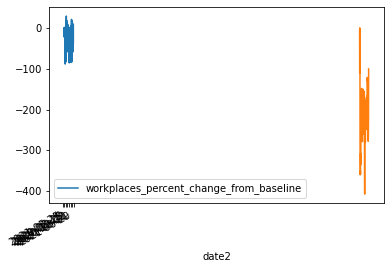

In [131]:
# Execute the cell with the following command to visualize the results
df_province_largest.plot('date', 'workplaces_percent_change_from_baseline')

df_province_largest.resample('7D', on='date2').sum()['workplaces_percent_change_from_baseline'].plot()

#### 7. Compare the results above with the results in the google mobility report pdf of your selected province. Discuss the differences and similarities. Please save the mobility report pdf that you use to compare the results with! An example mobility report pdf can be found [here](https://www.gstatic.com/covid19/mobility/2021-09-01_AW_Mobility_Report_en.pdf)